# Regression Lineaire - LinearRegression

## 1. Importation des packages utiles

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## 2. Generation de donnes aleatoires
$X, y$: sont des vecteurs a $m$ lignes et $1$ colonnes tel que $y = 1.5X +3$


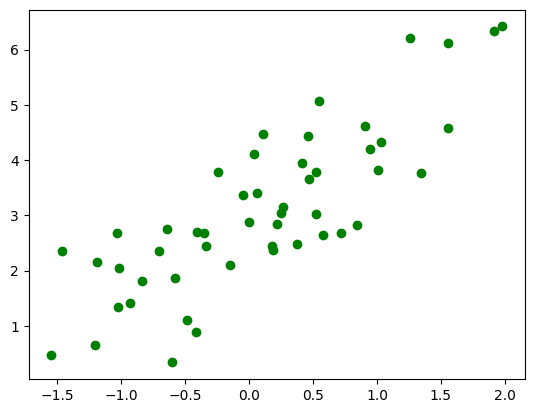

In [36]:
np.random.seed(19) # Fixe la generation aleatoire des donnes

m = 50
X = np.random.randn(m).reshape(-1,1) # array de m elemnts reshape en vecteur de de m lignes et 1 colonne
y = 1.5 * X + 3 + np.random.randn(m).reshape(-1,1)

# print(X, X.shape)
# print(y, y.shape)

plt.scatter(X,y, c='g')
plt.show()

## 3. Creation et entrainement du model
Le machine learning (ML) peut en effet être résumé en trois étapes clés : **create**, **fit**, et **predict**. Voici un développement sur chacun de ces termes :

### - **Create**
Créer un modèle consiste à choisir et à définir la structure de l’algorithme de machine learning qui sera utilisé pour apprendre à partir des données. Cela implique les étapes suivantes :

- **Sélection du modèle** : Il existe différents types d’algorithmes de machine learning, tels que les régressions linéaires, les arbres de décision, les réseaux neuronaux, etc. Le choix du modèle dépend du type de données et du problème à résoudre (classification, régression, clustering, etc.).
- **Préparation des données** : Il est nécessaire de nettoyer et préparer les données (imputation des valeurs manquantes, normalisation, encodage des variables catégorielles, etc.).
- **Choix des features** : La sélection des bonnes variables (features) qui auront une influence sur le modèle est essentielle. Ce processus s'appelle la **sélection des features**.

En résumé, "create" fait référence à la construction et à l'initialisation du modèle, ainsi qu’à la préparation des données pour l’apprentissage.

### - **Fit**
L’étape **fit** est celle où le modèle est entraîné (apprentissage). L’objectif est de trouver les paramètres optimaux qui minimisent l’erreur et maximisent la performance du modèle. Cette phase comprend :

- **Apprentissage** : Le modèle "apprend" à partir des données d'entraînement. Pendant ce processus, les paramètres internes du modèle sont ajustés en fonction des exemples donnés.
- **Optimisation** : Les algorithmes d'optimisation (comme la descente de gradient) sont utilisés pour ajuster les poids des modèles afin de minimiser la fonction de coût (erreur) entre les prédictions et les valeurs réelles.
- **Validation croisée** : Il est crucial d'évaluer la performance du modèle en le testant sur des données de validation pour éviter le surapprentissage (overfitting), où le modèle serait trop adapté aux données d'entraînement sans généraliser aux nouvelles données.

L'étape **fit** permet au modèle de "s'adapter" aux données en trouvant la meilleure configuration des paramètres.

### - **Predict**
Une fois que le modèle est entraîné, il peut être utilisé pour faire des prédictions sur de nouvelles données. Cette étape implique :

- **Prédiction** : Le modèle est maintenant capable de prédire les valeurs pour les nouvelles données en utilisant les patterns appris lors de l'entraînement. Ces prédictions peuvent concerner des résultats numériques (régression) ou des classes (classification).
- **Évaluation** : L'évaluation des performances du modèle sur des données non vues (données de test) est essentielle. On utilise des métriques comme l'exactitude (accuracy), la précision, le rappel, ou l’erreur quadratique moyenne (MSE) pour évaluer les performances.
- **Ajustement** : En fonction des résultats des prédictions et de leur évaluation, il peut être nécessaire de revenir en arrière et d'ajuster certains hyperparamètres ou de changer d’algorithme pour améliorer la performance.

L'étape **predict** consiste à appliquer le modèle pour générer des prédictions sur des nouvelles données et à évaluer sa capacité à généraliser.

### Résumé
- **Create** : Choisir le bon algorithme et préparer les données.
- **Fit** : Entraîner le modèle en ajustant ses paramètres aux données.
- **Predict** : Utiliser le modèle entraîné pour faire des prédictions et évaluer ses performances.

Ces trois étapes forment la base du cycle d'apprentissage automatique, avec des itérations possibles pour ajuster et améliorer le modèle en fonction des résultats obtenus. 

In [37]:
model = LinearRegression() # Definition du model
model.fit(X,y)             # Entrainement

LinearRegression()

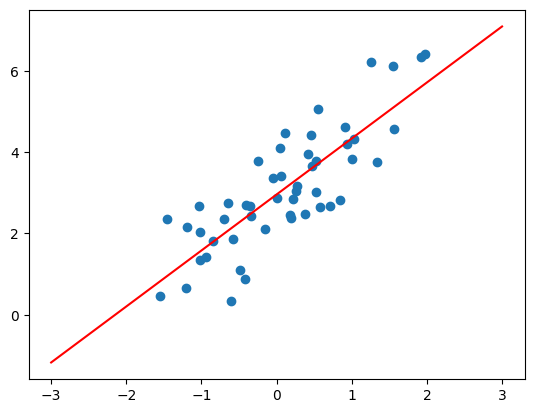

In [38]:
new_data = np.linspace(-3,3).reshape(-1,1)
# new_data
predictions = model.predict(new_data)

plt.scatter(X,y)
plt.plot(new_data,predictions, c='r')
plt.show()


# Régression Polynomiale avec `PolynomialFeatures`

La régression polynomiale est une méthode d'apprentissage supervisé où l'on dispose de **features** (variables explicatives) et d'une **target value** (variable à prédire). Lorsque l'on trace un graphe en scatter plot, par exemple avec `plt.scatter(X_1, y_1)`, on peut observer que les données ne suivent pas nécessairement une tendance linéaire. Dans le cas d'une relation non linéaire, comme une courbe de **degré 3**, un modèle de régression linéaire simple ne serait pas approprié, car il ne pourrait pas capturer correctement la structure des données.

C'est là qu'intervient l'algorithme `PolynomialFeatures`, qui permet de transformer les **features** en ajoutant des termes polynomiaux (par exemple, \(X^2\), \(X^3\)) afin de modéliser la non-linéarité des données.

## Comment fonctionne l'algorithme `PolynomialFeatures` ?

### Étape 1 : Importer et définir l'algorithme
Tout d'abord, nous devons importer `PolynomialFeatures` depuis `sklearn.preprocessing`. Ensuite, nous définissons le modèle avec le bon degré de polynôme, par exemple pour un polynôme de degré 3 :

```python
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
```

- **degree=3** : Cela signifie que nous utilisons un polynôme de degré 3.
- **include_bias=False** : Nous choisissons de ne pas inclure le terme de biais (constante) dans la transformation.

### Étape 2 : Transformer les features
Ensuite, nous utilisons l'objet `PolynomialFeatures` pour transformer nos **features** d'origine en **features polynomiales**. Cela permet d'ajouter des termes tels que \(X^2\), \(X^3\), etc.

```python
X_poly = poly_features.fit_transform(X_1)
```

À ce stade, chaque feature est transformée pour inclure les puissances correspondantes jusqu'au degré spécifié. Par exemple, si nous avions une feature \(X\), cela générerait \(X\), \(X^2\), \(X^3\), etc.

### Étape 3 : Appliquer la régression linéaire
Une fois les features transformées, nous pouvons utiliser un modèle de régression linéaire classique pour ajuster le modèle aux données transformées :

```python
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly, y_1)
```

Le modèle de régression linéaire est désormais ajusté sur les **features polynomiales** générées.

### Étape 4 : Faire des prédictions sur de nouvelles données
Lorsque de nouvelles données sont disponibles, il suffit d'appliquer la transformation polynomiale à ces nouvelles données et de les passer dans le modèle pour faire des prédictions :

```python
new_data_poly = poly_features.transform(new_data)
predictions = model.predict(new_data_poly)
```

### Conclusion
Le modèle de régression polynomiale permet de capturer des relations non linéaires dans les données, ce qui rend l'algorithme beaucoup plus flexible qu'une simple régression linéaire. Cependant, il faut faire attention à ne pas trop augmenter le degré du polynôme pour éviter le surapprentissage (*overfitting*).

En résumé, `PolynomialFeatures` ne fait qu'étendre les données en ajoutant des termes polynomiaux. Le modèle de régression linéaire est ensuite ajusté sur ces nouvelles données transformées.

Si tu veux des détails supplémentaires ou des exemples pratiques, n'hésite pas à demander !

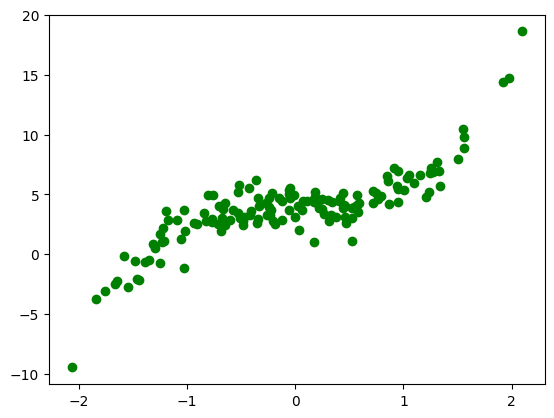

In [61]:
np.random.seed(19) # Fixe la generation aleatoire des donnes

m = 150
X_1 = np.random.randn(m).reshape(-1,1) # array de m elemnts reshape en vecteur de de m lignes et 1 colonne
y_1 = 1.5 * X_1**3 + 4 + np.random.randn(m).reshape(-1,1)

# print(X, X.shape)
# print(y, y.shape)

plt.scatter(X_1,y_1, c='g')
plt.show()

In [57]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)

X_poly = poly_features.fit_transform(X_1)

reg = LinearRegression()
reg.fit(X_poly, y_1)

LinearRegression()

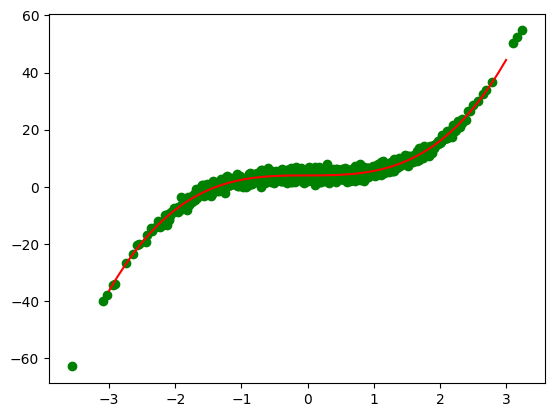

In [58]:
new_data = np.linspace(-3,3).reshape(-1,1)
X_vals_poly = poly_features.transform(new_data)

y_vals = reg.predict(X_vals_poly)

plt.scatter(X_1, y_1, c='g')
plt.plot(new_data, y_vals, c='r')
plt.show()
# new_data
